In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# check for missing value
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
def data_cleanup(df):
    '''
    df: pandas dataframe
    '''
    if type(df)!=pd.core.frame.DataFrame:
        raise ValueError('input is not a pandas dataframe')
    working_df = df.copy()
    cols = working_df.columns
    converted_columns = {}
    for col in cols:
        if working_df[col].dtype == 'O':
            unique_values = working_df[col].unique()
            converted_values = {v:k for k,v in enumerate(unique_values)}
            for value in unique_values:
                working_df[col] = working_df[col].replace(value, converted_values[value])
            converted_columns[col] = converted_values
    return working_df, converted_columns
clean_df,coverted=data_cleanup(df)
clean_df.head()
df=clean_df
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

<AxesSubplot:>

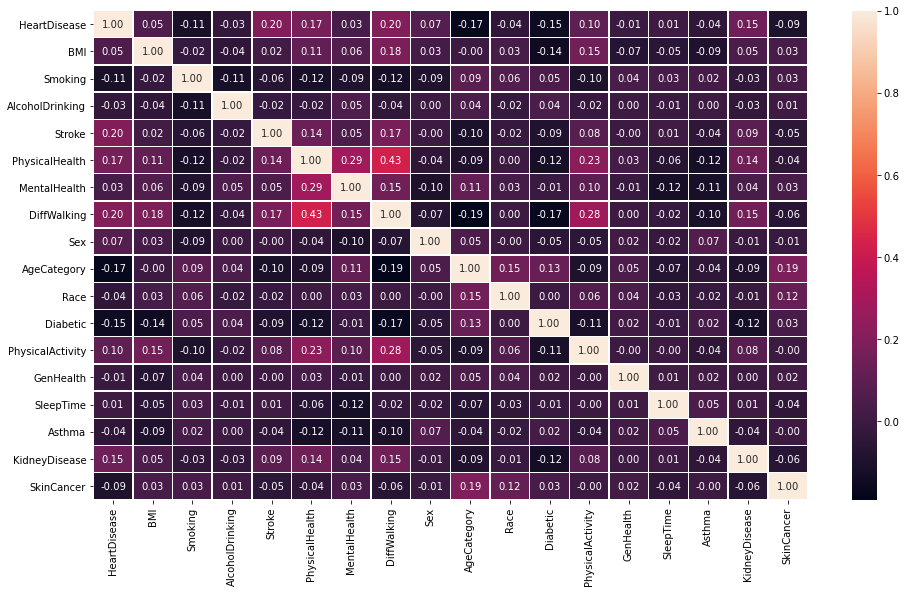

In [6]:
corr=df.corr()
plt.figure(figsize = (16,9))
sns.heatmap(corr,annot=True,fmt='0.2f',linewidths=0.5)

<AxesSubplot:xlabel='Smoking', ylabel='count'>

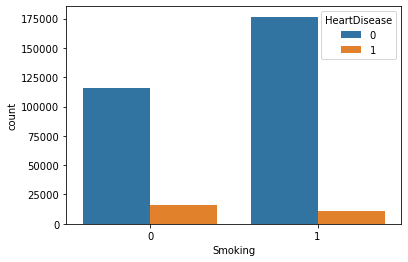

In [10]:
sns.countplot(data=df,x='Smoking',hue='HeartDisease')

<AxesSubplot:xlabel='Stroke', ylabel='count'>

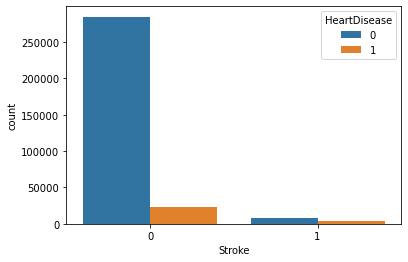

In [8]:
sns.countplot(data=df,x='Stroke',hue='HeartDisease')

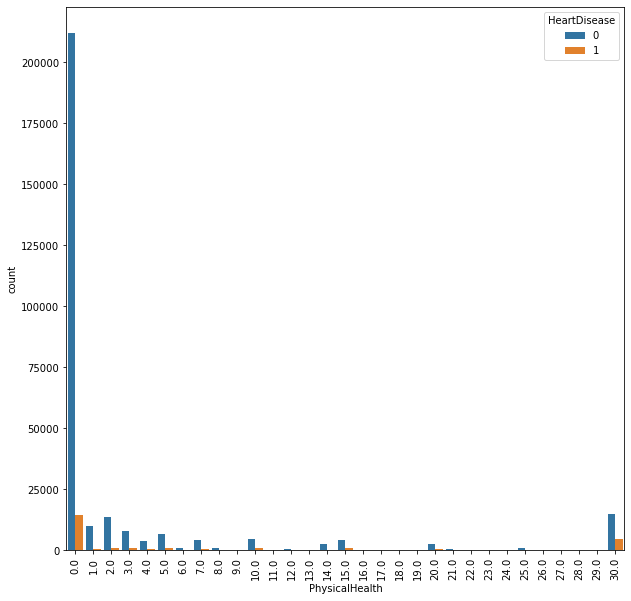

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='PhysicalHealth',hue='HeartDisease')
plt.xticks(rotation=90);

In [10]:
#feature and label
x = df.drop(labels='HeartDisease',axis=1)
y = df['HeartDisease']
print('No of samples=',x.shape[0])
print('No of features=',x.shape[1])
print('classes=',np.unique(y))
pd.DataFrame(y).value_counts()

No of samples= 319795
No of features= 17
classes= [0 1]


HeartDisease
0               292422
1                27373
dtype: int64

In [11]:
x
y


0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
x_test.shape

(159898, 17)

In [13]:
#M1. Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [14]:
##m2. Normalization
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(x_train)
x_train_mms=mms.transform(x_train)
x_test_mms=mms.transform(x_test)

In [15]:
#Perceptron model to test on dataset
from sklearn.linear_model import Perceptron
clf=Perceptron()
clf.fit(x_train,y_train)
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)

Training Acc= 0.9141509846963983
Testing Acc= 0.9149520319203492


In [17]:
## Standardization
clf.fit(x_train_std,y_train)
y_pred_train=clf.predict(x_train_std)
y_pred_test=clf.predict(x_test_std)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)

Training Acc= 0.8258566452153574
Testing Acc= 0.827452500969368


In [18]:
## MIN MAX TEST
clf.fit(x_train_mms,y_train)
y_pred_train=clf.predict(x_train_mms)
y_pred_test=clf.predict(x_test_mms)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)

Training Acc= 0.9108238428488339
Testing Acc= 0.9109494802936873


In [19]:
#LogisticRegression to test on dataset
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)


Training Acc= 0.9145387343102122
Testing Acc= 0.9147894282605161


E:\Documents\OSLAB\anacondqa\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print("Testing Acc=",test_acc)


In [ ]:
## Standardization
clf.fit(x_train_std,y_train)
y_pred_train=clf.predict(x_train_std)
y_pred_test=clf.predict(x_test_std)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)

In [ ]:
## MIN MAX TEST
clf.fit(x_train_mms,y_train)
y_pred_train=clf.predict(x_train_mms)
y_pred_test=clf.predict(x_test_mms)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print("Testing Acc=",test_acc)

In [ ]:
## Standardization
clf.fit(x_train_std,y_train)
y_pred_train=clf.predict(x_train_std)
y_pred_test=clf.predict(x_test_std)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)

In [ ]:
## MIN MAX TEST
clf.fit(x_train_mms,y_train)
y_pred_train=clf.predict(x_train_mms)
y_pred_test=clf.predict(x_test_mms)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print("Testing Acc=",test_acc)


In [ ]:
## Standardization
clf.fit(x_train_std,y_train)
y_pred_train=clf.predict(x_train_std)
y_pred_test=clf.predict(x_test_std)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)

In [ ]:
## MIN MAX TEST
clf.fit(x_train_mms,y_train)
y_pred_train=clf.predict(x_train_mms)
y_pred_test=clf.predict(x_test_mms)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Testing Acc=',accuracy_score(y_test,y_pred))

In [ ]:
## Standardization
clf.fit(x_train_std,y_train)
y_pred_train=clf.predict(x_train_std)
y_pred_test=clf.predict(x_test_std)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)

In [ ]:
## MIN MAX TEST
clf.fit(x_train_mms,y_train)
y_pred_train=clf.predict(x_train_mms)
y_pred_test=clf.predict(x_test_mms)
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test)
print("Training Acc=",train_acc)
print("Testing Acc=",test_acc)

In [ ]:
#RF,ETC
fe=rf.feature_importances_

In [ ]:
for i,j in zip(range(0,x.shape[1]),fe):
    print('Feature ',i,'Importance=',j)

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(0,x.shape[1]),fe)

In [ ]:
###Feature Selection
from sklearn.feature_selection import SelectFromModel
model=RandomForestClassifier().fit(x,y)
fs=SelectFromModel(model,prefit=True)
x_new=fs.transform(x)
print(x.shape)
print(x_new.shape)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,train_size=0.4,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Testing Acc=',accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import classification_report
clr=classification_report(y_test,y_pred)
print(clr)